In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from gnninterpreter import *

In [3]:
import matplotlib.pyplot as plt
import torch
from torch import nn

# Cyclicity

In [4]:
cyclicity = CyclicityDataset(seed=12345)
cyclicity_train, cyclicity_val = cyclicity.train_test_split(k=10)

/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [5]:
dataset.describe()

{'mean_n': 52.76344180335058,
 'mean_m': 52.51504254012806,
 'std_n': 25.45414709419518,
 'std_m': 25.46061875996072}

data: Data(x=[96, 1], edge_index=[2, 192], edge_attr=[192, 2], y=[1], G=Graph with 96 nodes and 96 edges)
class: red_cyclic


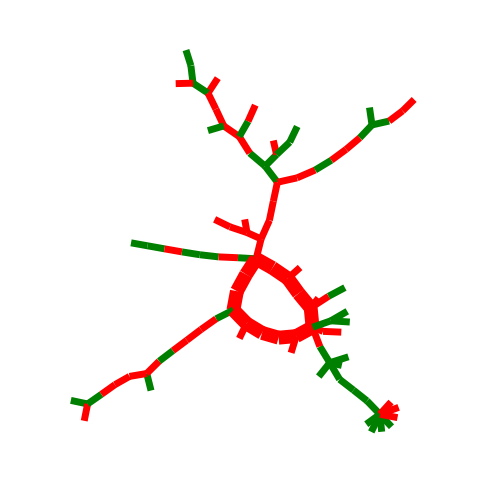

In [6]:
dataset.show(7)

# Train Model

In [7]:
model = NNConvClassifier(node_features=len(dataset.NODE_CLS),
                         edge_features=len(dataset.EDGE_CLS),
                         num_classes=len(dataset.GRAPH_CLS),
                         hidden_channels=32)

In [8]:
model.load_state_dict(torch.load('cyclicity_nnconv.pt'))

<All keys matched successfully>

In [9]:
train_data.evaluate_model(model)

/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


{'red_cyclic': 0.9628506302833557,
 'green_cyclic': 0.951839029788971,
 'acyclic': 0.9590314626693726}

In [10]:
val_data.evaluate_model(model)

{'red_cyclic': 0.9702276587486267,
 'green_cyclic': 0.9493243098258972,
 'acyclic': 0.9579229950904846}

In [15]:
mean_embeds = train_data.mean_embeddings(model)

In [16]:
mean_embeds

[tensor(1.1189), tensor(1.1823), tensor(1.7719)]